# Machine Learning - Hierarchical Clustering

Applying hierarchical clustering algorithm on a dataset

In [ ]:
!gdown 1w47_BBfkyyMNt1kNI7-nKM6JefR7Eh_S

Downloading...
From: https://drive.google.com/uc?id=1w47_BBfkyyMNt1kNI7-nKM6JefR7Eh_S
To: /content/bank_marketing_exercicio.csv
100% 4.74k/4.74k [00:00<00:00, 18.9MB/s]


In [ ]:
import pandas as pd

df_dados = pd.read_csv('bank_marketing_exercicio.csv')
df_dados

,age,balance,duration
0,37,4760,182
1,30,-393,435
2,32,2979,156
3,30,1185,284
4,42,221,720
...,...,...,...
395,47,477,973
396,40,4795,57
397,42,216,144
398,36,2880,283


## 1.

Getting a dataframe of the 10 closest objects to the first object by euclidean distance.

In [ ]:
import numpy as np
dist=[]
for i in range(len(df_dados.index)):
  dist.append(np.linalg.norm(df_dados.iloc[0]-df_dados.iloc[i]))

dist = np.array(dist)
dist = pd.DataFrame(dist, columns=['col1'])
dist = dist.sort_values(by=['col1'])

dist.head(10)

,col1
0,0.000000
338,5.000000
370,23.558438
394,46.043458
390,47.968740
275,54.230987
6,56.648036
156,65.635356
323,66.377707
201,87.561407


##2.

Getting a dataframe of the 10 closest objects to the first object by Minkowski-Manhattan distance.

In [ ]:
dist2=[]
for i in range(len(df_dados.index)):
  x1 = abs(df_dados.iloc[0]['age'] - df_dados.iloc[i]['age'])
  x2 = abs(df_dados.iloc[0]['balance'] - df_dados.iloc[i]['balance'])
  x3 = abs(df_dados.iloc[0]['duration'] - df_dados.iloc[i]['duration'])
  dist2.append(x1+x2+x3)

dist2 = np.array(dist2)
dist2 = pd.DataFrame(dist2, columns=['col1'])
dist2 = dist2.sort_values(by=['col1'])

dist2.head(10)

,col1
0,0
338,5
370,29
394,64
390,71
275,79
156,82
6,95
323,108
201,117


##3.

Applying hierarchical clustering using Single-Link and euclidean distance and plotting the dendrogram.

In [ ]:
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform, pdist
import matplotlib.pyplot as plt

In [ ]:
#distance matrix
pd.DataFrame(squareform(pdist(df_dados[['age', 'balance', 'duration']]), 'euclidean'),columns = df_dados.index.values, index = df_dados.index.values)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.000000,5159.211858,1781.196789,3576.461659,4570.775645,327.484351,56.648036,8117.252368,3481.468943,8396.707569,...,47.968740,4531.041161,5161.820318,225.590337,46.043458,4355.441424,129.842212,4544.161639,1882.711343,4558.146114
1,5159.211858,0.000000,3383.523164,1585.208188,677.026587,5483.497151,5139.087273,13273.788193,1683.451514,13549.767563,...,5186.459100,674.617669,161.449683,5339.453530,5198.496994,1023.050830,5201.762009,675.059997,3276.533076,661.473355
2,1781.196789,3383.523164,0.000000,1798.561648,2815.095025,2107.771809,1759.634905,9898.074762,1702.025264,10177.897131,...,1811.131414,2750.161813,3382.066380,1972.126010,1819.006872,2632.055850,1818.714106,2763.044155,161.077621,2777.018185
3,3576.461659,1585.208188,1798.561648,0.000000,1058.081282,3901.648113,3555.826064,11693.181090,104.259292,11971.004720,...,3604.569461,962.518571,1586.057061,3760.116089,3615.273434,988.065787,3617.143763,979.134822,1695.010914,992.639915
4,4570.775645,677.026587,2815.095025,1058.081282,0.000000,4891.353391,4552.847351,12670.310020,1162.241799,12942.112733,...,4595.291612,545.213720,765.381604,4741.672384,4611.621190,359.958331,4621.801489,576.021701,2694.677346,574.419707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,4355.441424,1023.050830,2632.055850,988.065787,359.958331,4671.257861,4339.680749,12429.445120,1087.269976,12697.332239,...,4377.276436,835.686544,1122.296307,4516.779051,4397.570920,0.000000,4414.094358,869.130025,2500.125997,871.670809
396,129.842212,5201.762009,1818.714106,3617.143763,4621.801489,330.231737,116.644760,8082.230447,3520.714274,8364.274087,...,163.260528,4567.549124,5200.529396,294.991525,99.090867,4414.094358,0.000000,4579.826853,1928.293805,4593.871026
397,4544.161639,675.059997,2763.044155,979.134822,576.021701,4870.495355,4522.156786,12661.027328,1067.274566,12940.835560,...,4573.640344,36.041643,630.553725,4731.947802,4582.018442,869.130025,4579.826853,0.000000,2667.630597,17.916473
398,1882.711343,3276.533076,161.077621,1695.010914,2694.677346,2207.111234,1863.179272,9998.361766,1601.607318,10276.003309,...,1910.041623,2653.267043,3281.013715,2065.198538,1922.200302,2500.125997,1928.293805,2667.630597,0.000000,2681.506666


In [ ]:
#distances in a condensed matrix
dist3 = pdist((df_dados[['age', 'balance', 'duration']]), 'euclidean')
dist3

array([5159.21185841, 1781.19678868, 3576.46165924, ..., 2667.63059662,
         17.91647287, 2681.50666604])

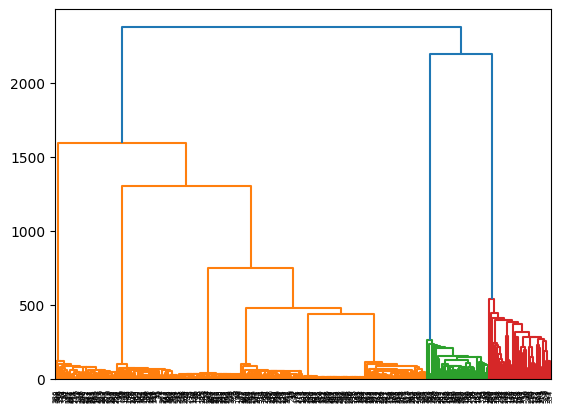

In [ ]:
clusters = shc.linkage(dist3, method = 'single')
dendrogram = shc.dendrogram(clusters)
plt.show()

##4.

Applying hierarchical clustering using Average-Link and euclidean distance and plotting the dendrogram.

In [ ]:
#distances in a condensed matrix
dist4 = pdist((df_dados[['age', 'balance', 'duration']]), 'euclidean')
dist4

array([5159.21185841, 1781.19678868, 3576.46165924, ..., 2667.63059662,
         17.91647287, 2681.50666604])

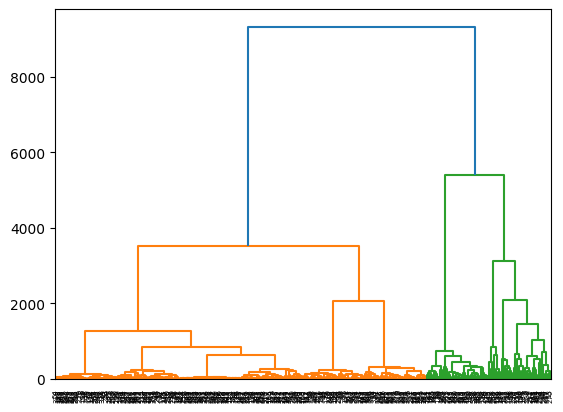

In [ ]:
clusters2 = shc.linkage(dist4, method = 'average')
dendrogram = shc.dendrogram(clusters2)
plt.show()

##5.
Identifying the appropriate number of clusters for single-link and average-link using the silhouette score.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import sklearn as skt

#single-link
silhuetas = []
for i in range (3,11):
  single = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'single')
  single_fit = single.fit_predict(df_dados)
  sil = skt.metrics.silhouette_score(df_dados, single_fit)
  silhuetas.append(sil)

print(silhuetas)

#best number of clusters in single-link = 5

[0.6513281778671453, 0.67254017246285, 0.7302185343753516, 0.7207913255364679, 0.6338420402143693, 0.6610779576867502, 0.6382251006787043, 0.7034038070819016]


In [ ]:
#average-link
silhuetas = []
for i in range (3,11):
  single = AgglomerativeClustering(n_clusters = i, metric = 'euclidean', linkage = 'average')
  single_fit = single.fit_predict(df_dados)
  sil = skt.metrics.silhouette_score(df_dados, single_fit)
  silhuetas.append(sil)

print(silhuetas)

#best number of clusters in single-link = 4

[0.6513281778671453, 0.7159252903584553, 0.7027635750067796, 0.696465950326659, 0.7135774279805044, 0.7130649821033721, 0.7036377732644883, 0.7083201653882838]
